# Lab Demonstration - KNN
****

K Nearest Neighbour (KNN) is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms. KNN used in the variety of applications such as finance, healthcare, political science, handwriting detection, image recognition and video recognition. In finance, financial institutes will predict the credit rating of customers. In loan disbursement, banking institutes will predict whether the loan is safe or risky. In political science, classifying potential voters in two classes will vote or won’t vote. KNN algorithm used for both classification and regression problems. KNN algorithm based on feature similarity approach.

KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real world datasets do not follow mathematical/theoretical assumptions. Lazy algorithm means it does not need any training data points for model generation. All training data are used in the testing phase. This makes training faster and testing phase slower and costlier. Costly testing phase means time and memory. In the worst case, KNN needs more time to scan all data points and scanning all data points will require more memory for storing training data.

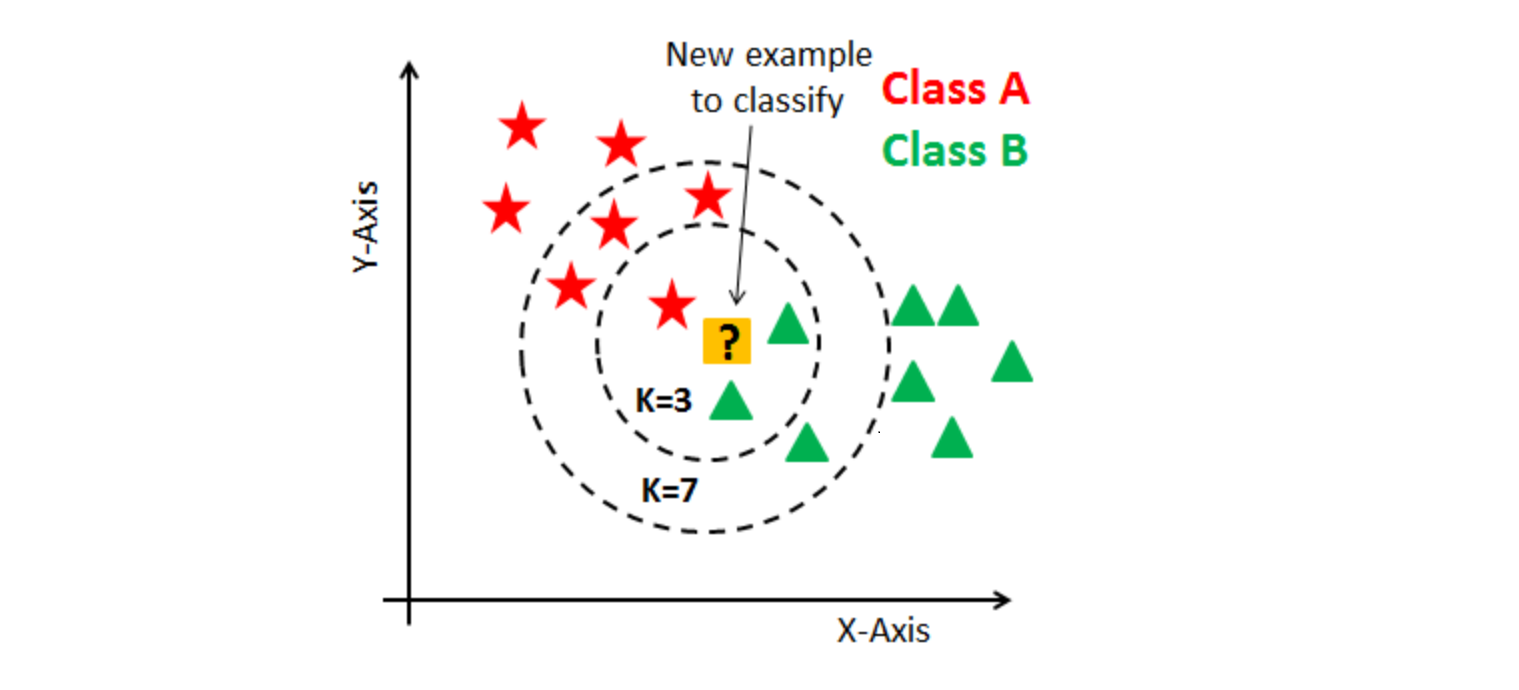

## How KNN work?

In KNN, K is the number of nearest neighbours. The number of neighbours is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbour algorithm. This is the simplest case. Suppose P1 is the point, for which label needs to predict. First, you find the one closest point to P1 and then the label of the nearest point assigned to P1.

Suppose P1 is the point, for which label needs to predict. First, you find the k closest point to P1 and then classify points by majority vote of its k neighbours. Each object votes for their class and the class with the most votes is taken as the prediction. For finding closest similar points, you find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance. KNN has the following basic steps:

1. Calculate distance
2. Find closest neighbors
3. Vote for labels 

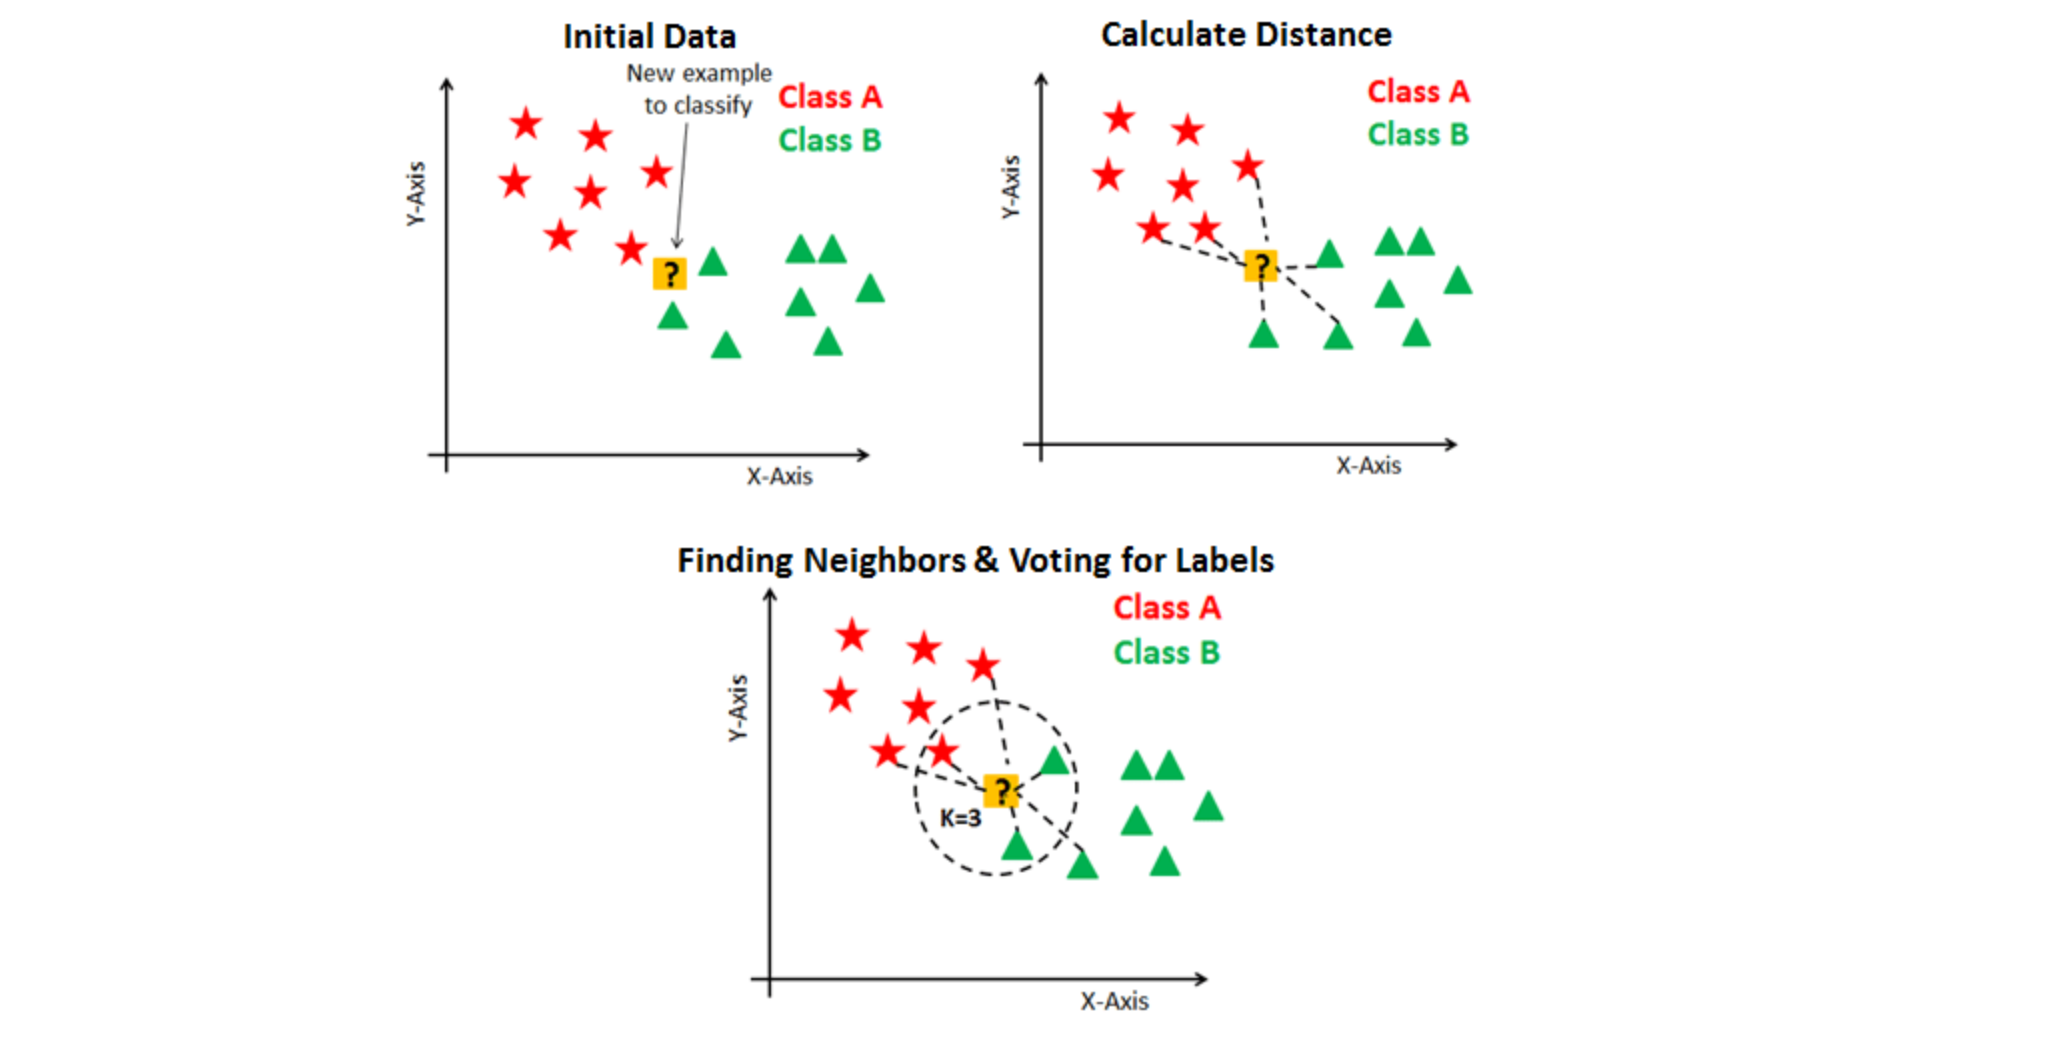 

Let's show how a KNN classifier work. 

***


## KNN Classifier

### Defining Dataset

Let's first create a dataset. Here you need two kinds of attributes or columns in your data: Feature and label. The reason for two types of column is "supervised nature of KNN algorithm".

Let's create a dataset with two features (in blue ) and one label (in orange) that contain a record of weather, temperature and the decision to play tennis from the past 14 days. This dataset will be used to build a model to predict whether the weather and temperature today is suitable for you to play a tennis match outdoor. 

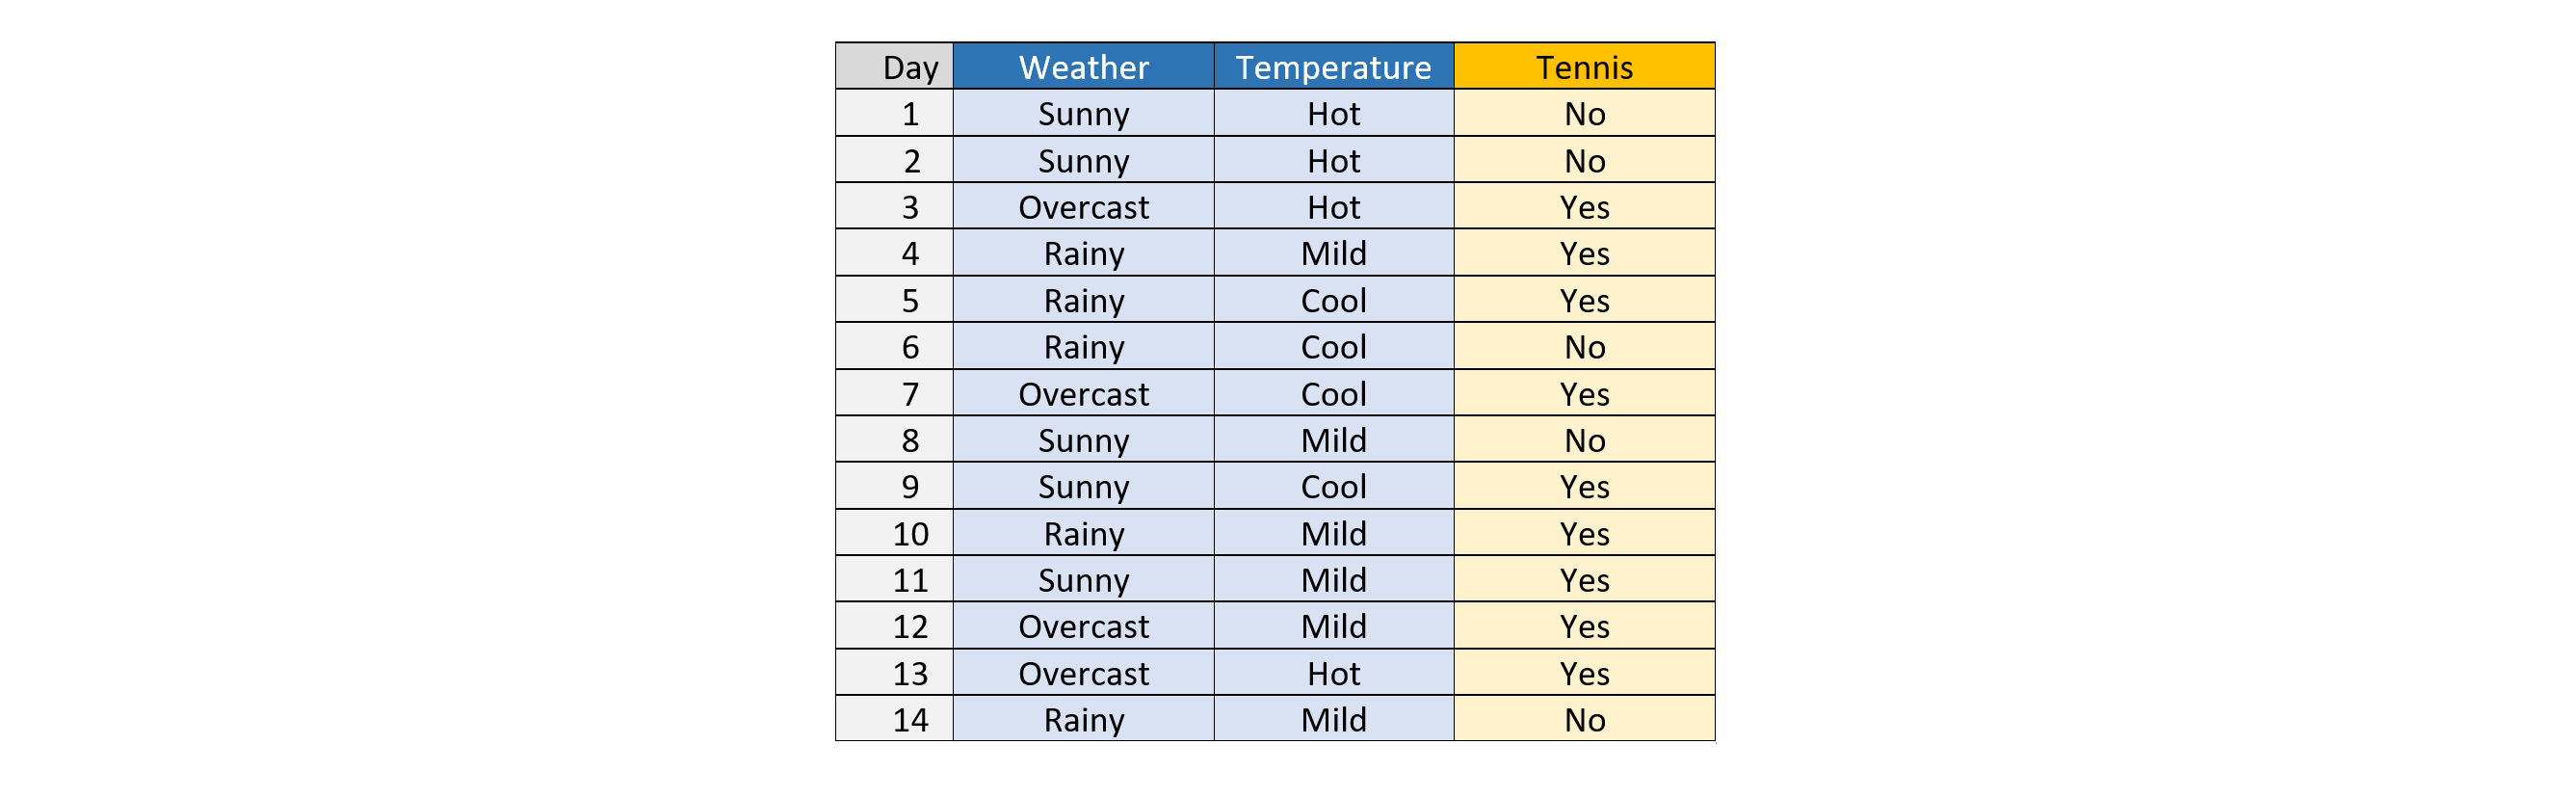


In [1]:
# First Feature
weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']

# Second Feature
temp = ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
tennis = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

### Encoding data columns

Various machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column.

In order to encode this data, you could map each value to a number. e.g. Overcast:0, Rainy:1, and Sunny:2.

This process is known as label encoding, and $sklearn$ conveniently will do this for you using $Label Encoder$.


In [2]:
# Importing preprocessing library
from sklearn import preprocessing

# Creating a labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded = le.fit_transform(weather)
print (weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


Here, you have imported preprocessing module and created Label Encoder object. Using this $LabelEncoder$ object, you can fit and transform "weather" column into the numeric column. Similarly, you can encode temperature and label into numeric columns.


In [3]:
# Converting string labels into numbers
temp_encoded = le.fit_transform(temp)
label = le.fit_transform(tennis)

### Combining Features

You can combine multiple columns or features into a single set of data using "zip" function.


In [4]:
# Combining weather and temp into a single list of tuples
features = list(zip(weather_encoded, temp_encoded))

### Generating Model

Let's build KNN classifier model.

First, import the $KNeighborsClassifier$ module and create KNN classifier object by passing argument 'n_neighors' that represent the number of neighbours (K) in the $KNeighborsClassifier()$ function. Let's set $K=3$. 

Next, fit your model on the train set using $fit()$ before you perform your prediction on the test set with $predict()$.


In [5]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(features, label)

KNeighborsClassifier(n_neighbors=3)

Assume today's weather is overcast and the temperature is mild, let's test the outcome of the KNN model to predict wether you should play tennis today. 

In [6]:
# Predict the Output
predicted = model.predict([[0, 2]]) # 0:Overcast, 2:Mild
print (predicted)

[1]


In the above demonstration, you have given input [0, 2], where 0 means Overcast weather and 2 means Mild temperature. The KNN model has predicts [1], which means today's weather and temperature is suitable for you to play tennis.
